## Data Cleaning 
- Deal with structural errors, transformation and standardization..

## Data Manipulation 
- concatenate and merge the data.


### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np

### Loading the DataSet

In [4]:
df1 = pd.read_excel(r"C:\Users\sathi\Downloads\data.xlsx",sheet_name=0)
df2 = pd.read_excel(r"C:\Users\sathi\Downloads\data.xlsx",sheet_name=1)

In [26]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,17850.0
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,17850.0
2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,17850.0
3,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,17850.0
4,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,17850.0


### Deal with structural errors

In [29]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,#6,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,4.23,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,5.07,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,5.91,United Kingdom


In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    234 non-null    object 
 1   StockCode    234 non-null    object 
 2   Description  234 non-null    object 
 3   Quantity     234 non-null    object 
 4   UnitPrice    234 non-null    float64
 5   Country      234 non-null    object 
dtypes: float64(1), object(5)
memory usage: 11.1+ KB


In [62]:
df1["Quantity"] = df1["Quantity"].replace(r"[*# &]","",regex=True)

In [71]:
df1["Quantity"] = df1["Quantity"].astype("int16")

In [72]:
df1["InvoiceNo"] = df1["InvoiceNo"].replace("C","",regex=True)

In [73]:
df1["InvoiceNo"]=df1["InvoiceNo"].astype("int64")

In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    234 non-null    int64  
 1   StockCode    234 non-null    object 
 2   Description  234 non-null    object 
 3   Quantity     234 non-null    int16  
 4   UnitPrice    234 non-null    float64
 5   Country      234 non-null    object 
dtypes: float64(1), int16(1), int64(1), object(3)
memory usage: 9.7+ KB


### Transformation

In [76]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,4.23,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,5.07,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,5.91,United Kingdom


In [80]:
df1["UnitPrice"].mean()

3.5843589743589743

In [81]:
df1["UnitPrice"].median()

2.55

<Axes: ylabel='Density'>

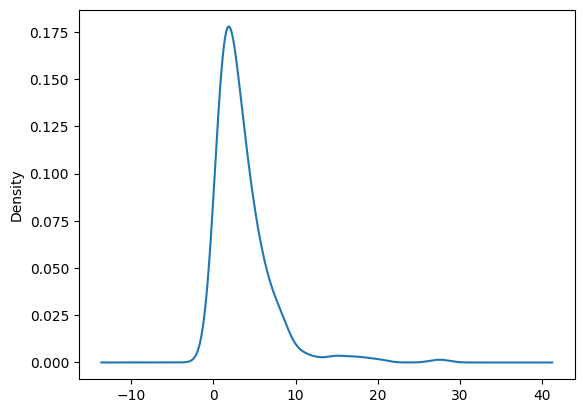

In [82]:
df1["UnitPrice"].plot(kind="kde")

<Axes: ylabel='Density'>

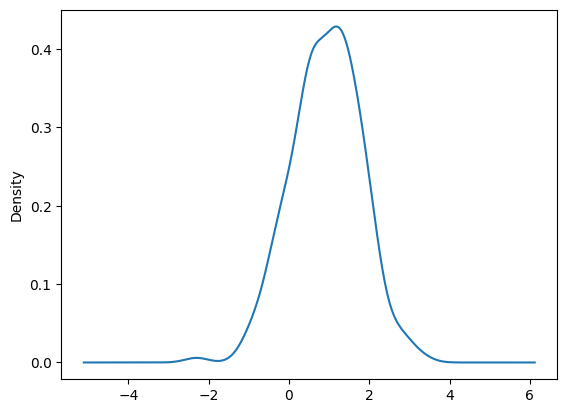

In [84]:
np.log(df1["UnitPrice"]).plot(kind="kde")

<Axes: ylabel='Density'>

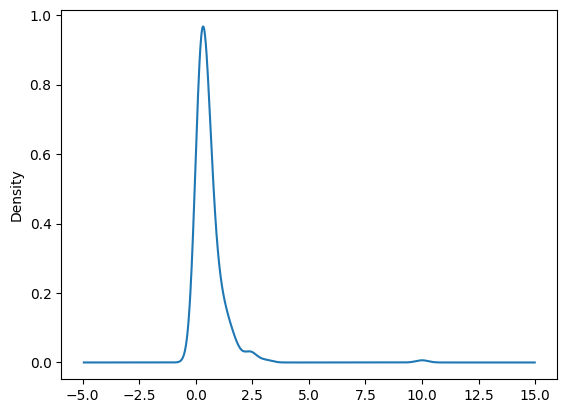

In [85]:
np.reciprocal(df1["UnitPrice"]).plot(kind="kde")

In [86]:
df1["Quantity"].mean()

23.22222222222222

In [87]:
df1["Quantity"].median()

6.0

<Axes: ylabel='Density'>

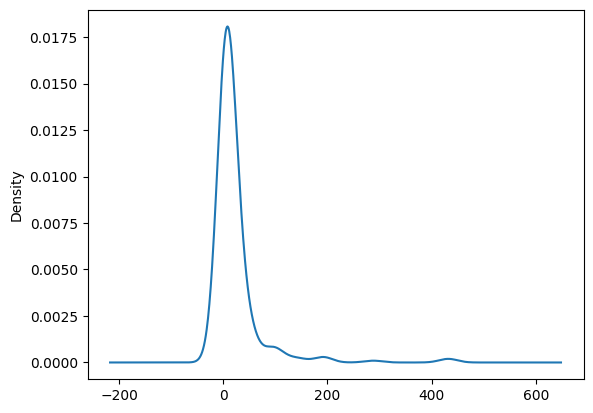

In [88]:
df1["Quantity"].plot(kind="kde")

In [105]:
import warnings
warnings.filterwarnings("ignore")

<Axes: ylabel='Density'>

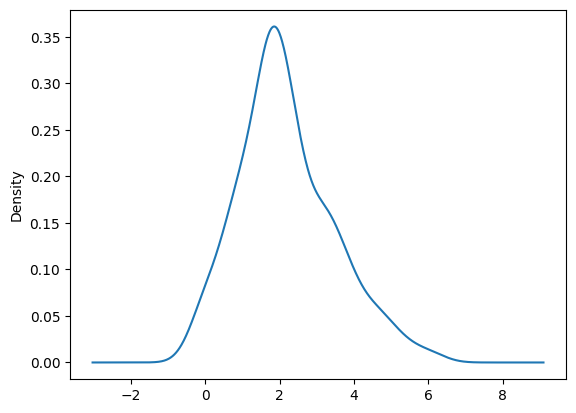

In [106]:
np.log(df1["Quantity"]).plot(kind="kde")

<Axes: ylabel='Density'>

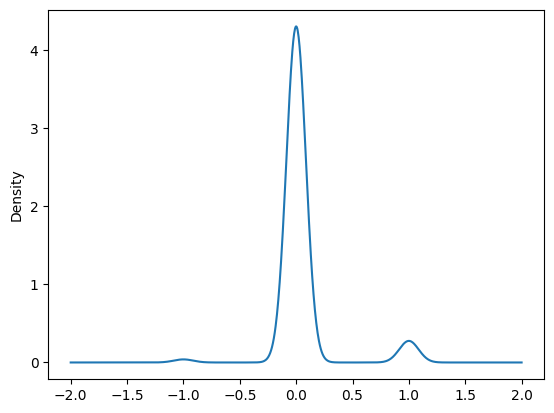

In [91]:
np.reciprocal(df1["Quantity"]).plot(kind="kde")

### Standardization

In [93]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,4.23,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,5.07,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,5.91,United Kingdom


In [94]:
def standard(x):
    n = (x-df1["UnitPrice"].mean())/(df1["UnitPrice"].std())
    return n
df1["UnitPrice"].apply(standard)

0     -0.299722
1     -0.056319
2      0.187085
3      0.430488
4      0.673892
         ...   
229    0.192880
230   -0.056319
231    0.047997
232   -0.609772
233   -0.676418
Name: UnitPrice, Length: 234, dtype: float64

In [96]:
def standard(x):
    n = (x-df1["Quantity"].mean())/(df1["Quantity"].std())
    return n
df1["Quantity"].apply(standard)

0     -0.329666
1     -0.329666
2     -0.291383
3     -0.329666
4     -0.329666
         ...   
229    0.014888
230    0.014888
231    0.014888
232    0.474294
233    1.393106
Name: Quantity, Length: 234, dtype: float64

### Merging dataframes

In [97]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice',
       'Country'],
      dtype='object')

In [98]:
df2.columns

Index(['InvoiceNo', 'CustomerID'], dtype='object')

In [99]:
df = pd.merge(df1,df2,on="InvoiceNo",how="inner")

In [100]:
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,17850.0
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,17850.0
2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,17850.0
3,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,17850.0
4,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,17850.0
...,...,...,...,...,...,...,...
4062,536390,22969,HOMEMADE JAM SCENTED CANDLES,96,1.25,United Kingdom,17511.0
4063,536390,22969,HOMEMADE JAM SCENTED CANDLES,96,1.25,United Kingdom,17511.0
4064,536390,22969,HOMEMADE JAM SCENTED CANDLES,96,1.25,United Kingdom,17511.0
4065,536390,22969,HOMEMADE JAM SCENTED CANDLES,96,1.25,United Kingdom,17511.0


### Concatinate DataFrames

In [101]:
pd.concat([df1,df2],ignore_index=True)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2.55,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6.0,3.39,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,4.23,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,5.07,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,5.91,United Kingdom,NaN
...,...,...,...,...,...,...,...
542138,581587,NaN,NaN,NaN,NaN,NaN,12680.0
542139,581587,NaN,NaN,NaN,NaN,NaN,12680.0
542140,581587,NaN,NaN,NaN,NaN,NaN,12680.0
542141,581587,NaN,NaN,NaN,NaN,NaN,12680.0
